# Module 4: Unsupervised Learning and Clustering

# Introduction

In supervised learning, each observation in the dataset has at least one distinguished variable that we consider to be dependent on the others. If this distinguished variable is a numeric value, we call the learning process regression, and if it is a class label we call it classification.  The dependent variable is also referred to as the target variable or response variable.

Unsupervised learning refers to methods for finding patterns in data where the dataset doesn't have such a distinguished dependent variable. In this case we can still ask questions the interrelationships between the variables: do they group together in some fashion or tend to move in tandem (i.e. are they correlated in some way?).

One of the most useful forms of unsupervised learning is **cluster analysis**.  It is a collection of machine learning algorithms that group data that group examples (observations) in the dataset by some measure of their commonality.  These techniques can be used, for example, to identify customer segments for business applications or similar species in biology.

# Learning Outcomes

In this module, you will:

* Distinguish and describe unsupervised learning
* Identify clustering concepts
* Become familiar with clustering algorithms such as k-means, hierarchical and DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

# Readings and Resources

We invite you to further supplement this notebook with the following recommended texts/resources:

* Bishop, C. M. (2006). *Pattern recognition and machine learning*. New York :Springer. https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf


* Grus, J. (2015). *Data science from scratch: first principles with Python.* First edition. Sebastopol, CA: O'Reilly.


* James, G., Witten, D., Hastie, T., & Tibshiran, R. (2017).  *An Introduction to Statistical Learning: with Applications in R*. First edition., Springer.


* scikit-learn developers, (2018). *Clustering*. scikit-learn documentation.  http://scikit-learn.org/stable/modules/clustering.html

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-4:-Unsupervised-Learning-and-Clustering" data-toc-modified-id="Module-4:-Unsupervised-Learning-and-Clustering">Module 4: Unsupervised Learning and Clustering</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Supervised-vs-Unsupervised" data-toc-modified-id="Supervised-vs-Unsupervised">Supervised vs Unsupervised</a></span>
</li>
<li><span><a href="#Unsupervised-Machine-Learning" data-toc-modified-id="Unsupervised-Machine-Learning">Unsupervised Machine Learning</a></span>
<ul class="toc-item">
<li><span><a href="#Unsupervised-Algorithms" data-toc-modified-id="Unsupervised-Algorithms">Unsupervised Algorithms</a></span>
</li>
<li><span><a href="#Clustering" data-toc-modified-id="Clustering">Clustering</a></span>
</li>
<li><span><a href="#K-Means" data-toc-modified-id="K-Means">K-Means</a></span>
</li>
<li><span><a href="#Determining-the-number-of-clusters-and-evaluation" data-toc-modified-id="Determining-the-number-of-clusters-and-evaluation">Determining the number of clusters and evaluation</a></span>
<ul class="toc-item">
<li><span><a href="#Elbow-graph" data-toc-modified-id="Elbow-graph">Elbow graph</a></span>
</li>
<li><span><a href="#Inertia" data-toc-modified-id="Inertia">Inertia</a></span>
</li>
<li><span><a href="#Silhoutte-coefficient" data-toc-modified-id="Silhoutte-coefficient">Silhoutte coefficient</a></span>
</li>
</ul>
</li>
<li><span><a href="#K-means-for-image-segmentation" data-toc-modified-id="K-means-for-image-segmentation">K-means for image segmentation</a></span>
</li>
<li><span><a href="#Challenges-with-K-means-clustering" data-toc-modified-id="Challenges-with-K-means-clustering">Challenges with K-means clustering</a></span>
</li>
<li><span><a href="#Hierarchical-clustering" data-toc-modified-id="Hierarchical-clustering">Hierarchical clustering</a></span>
<ul class="toc-item">
<li><span><a href="#Other-implementations" data-toc-modified-id="Other-implementations">Other implementations</a></span>
</li>
</ul>
</li>
<li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN">DBSCAN</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Supervised vs Unsupervised

We've seen in the previous module that algorithms used to build classifiers need "supervised" data examples [(𝑥<sub>1</sub>,𝑦<sub>1</sub>),…(𝑥<sub>n</sub>,𝑦<sub>n</sub>)].
The input data to the learner consists of examples with class labels (or target values) e.g., an example (𝑥<sub>i</sub> ,𝑦<sub>i</sub>) includes the correct response 𝑦<sub>i</sub> to the input 𝑥<sub> i</sub> .
In unsupervised machine learning, the data does not have labels, only examples [𝑥<sub>i</sub>,…,𝑥<sub>n</sub>].

When we collect data about a population of people or objects of some kind they often form natural subgroups of some kind which we will call clusters. A data set showing where millionaires live probably has clusters in certain neighbourhoods in your city. A data set showing how many hours people work each week probably has a cluster around 40 and another just below the number of hours that defines the difference between part and fulltime. A data set of demographics of registered voters can be clustered in many different ways depending on how we define their similarity.

Unlike some of the problems we’ve looked at, there is generally no single “correct” clustering. Furthermore, the clusters won’t label themselves. You’ll have to do that by looking at the data underlying each one.

# Unsupervised Machine Learning

A clustering algorithm still produces an output for each input 𝑥 the same way supervised learning does, but the output 𝐶(𝑥) is an identifier (usually just a number starting with 0 or 1) of which cluster this observation is most likely to belong to.  Since the clusters were discovered by the algorithm itself, there's no pre-existing "right answer" that we can use to test the performance of the model.  Therefore, it is very hard to say whether a model “did well.”

For example, consider a dataset of social media profile pictures. Our hypothetical clustering algorithm could have grouped together all the pictures that show faces in profile and all the full-face pictures. This would certainly be a possible way to divide a collection of pictures of people’s faces, but it’s not the one we might be looking for.

There is no way for us to explicitly “tell” the algorithm what we are looking for.  The best we can do is specify the measure of similarity we want the algorithm to use when grouping items together.  Often the only way to evaluate the result of an unsupervised algorithm is to inspect it manually.  As a consequence, unsupervised algorithms are used often in an exploratory setting, when a data scientist wants to understand the data better, rather than as part of a fully-automatic system.

Another common application for unsupervised algorithms is as a preprocessing step for supervised algorithms. Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms, or can lead to reduced memory and time consumption.  We will look at this more closely when we study dimensionality reduction in an upcoming module.


## Unsupervised Algorithms

Making sense of unlabelled data might look like a daunting task, especially if the problem you're trying to tackle doesn't suggest specific patterns to look for or involves a large number (as is the case when analyzing human behaviour). You may need to isolate a particular behaviour among many, or to pick up behaviours that stand out. Clustering can be very helpful for these types of problems.  Clustering techniques can also help with problems like:

* Compressing data
* Detecting outliers
* Facilitating other learning

Approaches in unsupervised learning broadly fall into three classes:

1) **Dimensionality reduction**: Can we represent each input case using a smaller number of variables i.e. is most of the predictive information packed into just a few of the variables in our dataset? Some examples include: 
  
- principal components analysis, 
- factor analysis, and 
- independent components analysis.

If you are interested in getting a sneak peak on this upcoming topic, a brief tutorial and implementation details in scikit learn for dimensionality reduction is given here:


https://scikit-learn.org/stable/modules/unsupervised_reduction.html


2) **Clustering**: Can we represent each input case using an archetypical example e.g. can we identify a customer segment and its average characteristics so we can develop a service that would appeal to most people in that cluster. Examples of clustering are:

- k-means and
- mixture models.

A tutorial for clustering including comparisons of many clustering algorithms like k-means, DBSCAN, Gaussian mixtures and implementation using scikit-learn libraris can be accessed here:

https://scikit-learn.org/stable/modules/clustering.html


3) **Density estimation**: estimating the probability distribution over the data space. This is a useful technique for feature engineering and data modelling as well.

A tutorial for density estimation is here:

https://scikit-learn.org/stable/modules/density.html


There are other techniques more suited for **outlier detection**, such as in high-demensional datasets, but they are beyond the scope of this module.  We will concentrate mainly on clustering here and we will explore a few clustering algorithms.


For your reference, an exhaustive list of methods available in the scikit-learn toolkit can be found on the scikit-learn website: 

https://scikit-learn.org/stable/unsupervised_learning.html#

## Clustering

Clustering algorithms are useful for applications such as:
- automatic topic detection of documents,
- anomoly detection,
- customer segmentation, and  
- variable selection.

The basic idea of clustering is that similar examples should be clustered together based on that similarity, while different examples should be in different clusters. A clustering algorithm should also learn how to assign a reasonable cluster id to an example that it hasn't seen in the training set.

We can consider each input to be a vector in d-dimensional space where d is the number of variables in our dataset (i.e. the number of columns if you think of it as a table).  The variables must be numeric.  Categorical variables can be used by converting them to indicator variables (as discussed in the Statistics course) or if they are ordinal in nature (e.g. small, medium, large) it might be better to convert them to at least approximately quantitative values.

For example, each input could be a numeric vector that somehow encodes the words used in the title of a blog post, in which case the goal might be to find clusters of posts with similar topics, perhaps in order to understand what our users are blogging about. Or imagine that we have a picture containing thousands of (red, green, blue) colors and that we need to screen-print a 10-color version of. Clustering can help us choose 10 colors that will minimize the total “color error.”

This definition of the input as a vector in d-space is significant.  We are abstracting out (i.e. ignoring) the *meaning* of any of the variables and treating them purely as d-dimensional vectors, where all of the dimensions are on an equal footing with each other.  Our goal will be to identify clusters of similar inputs i.e. sets of points that occupy closeby regions in this abstract space, and (sometimes) to find a representative (average) vector for each cluster.

## K-Means

One of the simplest clustering methods is k-Means, in which the number of clusters k is chosen by the data scientist in advance (i.e. it's a hyperparameter), after which the goal of the algorithm is to partition the inputs into sets S1, ..., Sk in a way that minimizes the total sum of squared distances from each point to the mean of its assigned cluster.  (We use squared distances for the same reason that we use squared error generally i.e. we're assuming that the data in a cluster is normally-distributed about the cluster's centre (centroid) so the probability that a point belongs to a cluster drops as the square of the distance from the centre).

There are a lot of ways to assign n points to k clusters, which means that finding an optimal clustering is a very hard problem, especially if the clusters are fuzzy and/or overlapping. What constitutes "optimal" may even have different meanings for different use cases, so we want to be sure we're only including variables that we want to affect the clustering.

In the end we need to settle for an algorithm that usually finds a good-enough clustering:

1. Start with a set of k seed points called means or centroids, which are points chosen, usually at random, in d-dimensional space.<br><br>

2. Assign each point to the mean to which it is closest.<br><br>

3. If no point’s assignment has changed, stop and keep the clusters.<br><br>

4. If some point’s assignment has changed, recompute/refit the means and return to
   step 2.


<figure>
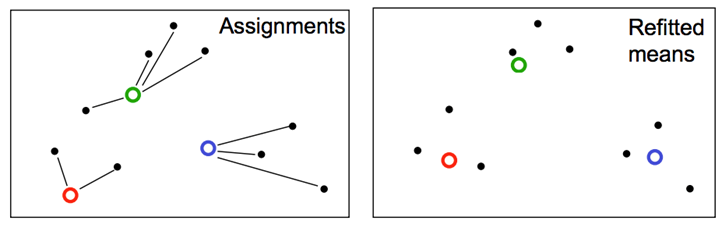
</figure>



The image represents the iterative algorithm that finds a good clustering using k-means clustering.  Note how the centroids have moved from their randomly chosen initial locations to the centres of the clusters.

Let us look at an example of k-means clustering code.  Please refer to the provided script "clustering.py".

You may run this in your python console: `python clustering.py`
    
Note that there is another script `linear_algebra.py` that has helper functions required for `clustering.py`.  So make sure to have them both in the same directory before you run `clustering.py`.

The class k-means takes care of assigning each data point to the mean and recomputing the means. `vector_mean` is a helper function used for this purpose. 

We typically start with some 'k' based on assumptions or domain knowledge if possible rather than choosing them entirely arbitrarily.  We often keep trying out different values.  But there is a wide variety of ways to choose a k. One that’s reasonably easy to understand involves plotting the sum of squared errors
(between each point and the mean of its cluster) as a function of k and looking at where the graph “bends,”. Please refer to the `squared_clustering_errors` method which was used for this purpose in the program.  

This type of a graph is sometimes referred to as the elbow graph.<br><br>


<figure>
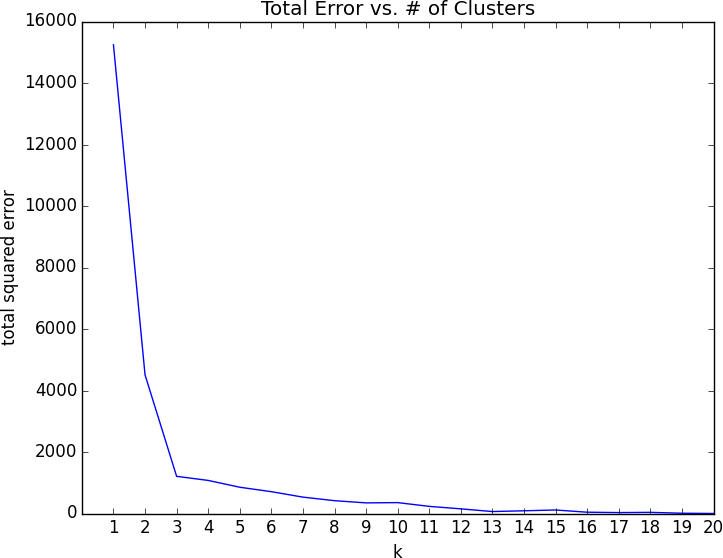
</figure>


[Grus, J. (2015). Data science from scratch: first principles with Python. First edition. Sebastopol, CA: O'Reilly]

In the graph above, we plot squared clustering errors vs k (number of clusters).  The graph bends at k = 3, which means a good number of clusters to choose is 3.  









## Determining the number of clusters and evaluation

Often the hardest part of solving an unsupervised learning problem can be finding the right estimator for the job.  Different estimators are better suited for different types of data and different problems.

We will discuss some of the most commonly used evaluation techniques here.  

### Elbow graph 


As we saw in the graph abobe, the Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help with finding the appropriate number of clusters in a dataset.

This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, resulting in a kink in the graph. The number of clusters is chosen at this point.  This is sometimes called the "elbow criterion".


### Inertia


As discussed, the k-means algorithm clusters data by trying to separate samples into n groups (of equal variance), minimizing within-cluster sum-of-squares. This is also referred to as the _inertia_.  The k-means algorithm aims to choose centroids that minimize the inertia, or a "within-cluster sum-of-squares criterion".

**Inertia** is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster. 
Inertia can be recognized as a measure of how internally coherent clusters are. 

It suffers from various drawbacks however:

* Inertia makes the assumption that clusters are convex (not cup-shaped) and isotropic (no directions in the space are more important than others), which is not always the case. 

It responds poorly to elongated clusters, or manifolds with irregular shapes.

* Inertia is not a normalized metric.

Lower values of inertia are better and zero is optimal. A low value indicates that the points in the clusters are close to their cluster's centre.
 
Let's see how to calculate inertia.  Here, we will manually create data with a goal of 5 clusters and 40 data points to each cluster. We will work with two-dimensional data. We will use the k-means algorithm from the scikit-learn library to fit the data. 

[[0.40404581 0.88289084]
 [0.87012069 0.28853696]
 [0.35019511 0.31611699]
 [0.45156415 0.0851465 ]
 [0.54165584 0.35310132]]


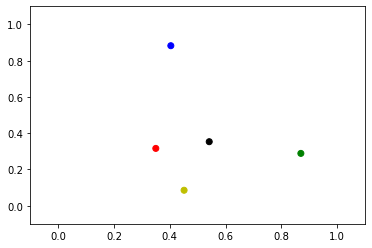

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42) 

trueK = 5 # Desired number of clusters
colors = 'bgrykcm'
colors=[*colors]
#print(colors)
dim = 2 # dimension of feature space
n = 40 # points per cluster
trueCentroids = np.random.rand(trueK,dim) # generating centroids at random
print(trueCentroids)


if dim==2:
    plt.scatter(trueCentroids[:,0],trueCentroids[:,1], color=colors[:len(trueCentroids)])
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.show()
    


Next, we set the variance and generate some fake data points around each centroid.  Please note here that we are using a low variance to generate 5 actual dense clusters which we will see if k-means can find.

In [2]:
sigma_xx = 0.002 # factor for variance
sigma_xy = 0.0002 # factor for covariance
XasList = [] # storing the points around each center, as a list of arrays (one array per center)
X = trueCentroids # The actual centroids, to which the generated points will be added

# loop through the centroids
for c in trueCentroids:
    # data generated for each centroid:
    X_c = np.random.multivariate_normal(c,np.array([[sigma_xx*np.random.rand(),  sigma_xy*(2*np.random.rand()-1)], 
                                                    [sigma_xy*(2*np.random.rand()-1), sigma_xx*np.random.rand()]]), n) 
    XasList.append(X_c) # list of arrays
    X = np.append(X,X_c, axis=0) # single array

np.random.shuffle(X) # shuffle the array

/var/folders/dl/nzqz9d4s48z5l005svj0w2sr0000gn/T/ipykernel_8421/13825499.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  X_c = np.random.multivariate_normal(c,np.array([[sigma_xx*np.random.rand(),  sigma_xy*(2*np.random.rand()-1)],


Now, let's use scikit's `KMeans` function to fit the data.

In [3]:
kmeans = KMeans(n_clusters=trueK, random_state=0).fit(X)        

Now, let's find the inertia, the sum of squared error for each cluster:

In [4]:
def getInertia(X,kmeans):
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    return inertia


In [5]:
getInertia(X,kmeans)

0.509155267183387

The lower the value of the inertia, the better the clustering.  Try increasing the variance and see what happens.

So far we only saw k-means in a two-dimensional space.  In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal Component Analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations. 
Refer to PCA here:  https://en.wikipedia.org/wiki/Principal_component_analysis.

Here's what can happen when we have clusters that are anisotropic, unequal variance and/or unevenly sized. k-means can produce unintuitive and possibly unexpected clusters.

Automatically created module for IPython interactive environment


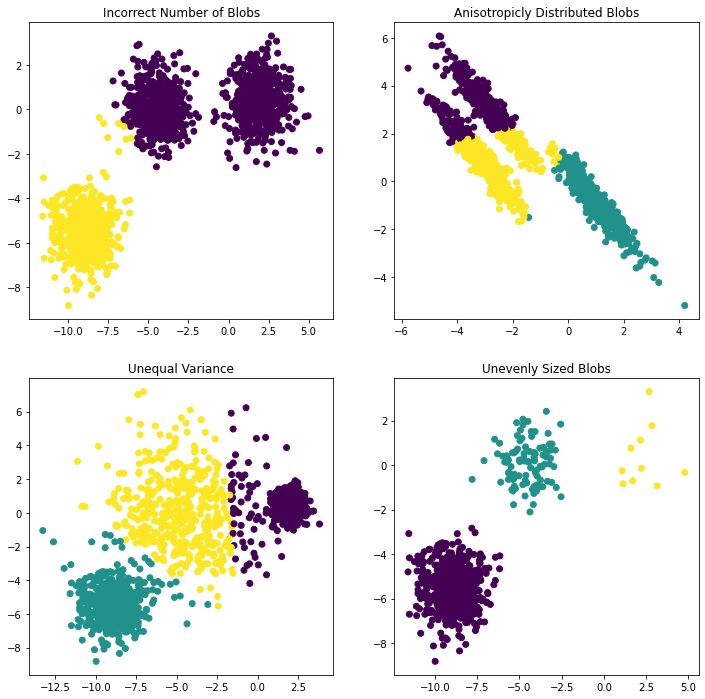

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()


In the first three plots, the input data does not conform to one of the assumptions that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.

### Silhoutte coefficient 

Another performance measure is called _silhouette_.  If the ground truth labels are not known or when we have no idea of what could be a good number of clusters, evaluation must be performed using the model itself.  The silhoutte coefficient is an example of such an evaluation.  A larger Silhoutte coefficient score relates to a model with better defined clusters.

The silhouette $s(x)$ for a point $x$ is defined as:

$$ s(x) = \frac{b(x)-a(x)}{\max\{a(x),b(x)\}} $$

where 

- $a(x)$ is the average distance between $x$ and the points in the cluster $x$ belongs

- $b(x)$ is the lowest average distance between $x$ and the points the clusters $x$ does not belong to

$s(x)$ is a quantity in $[-1,1]$. The silhouette score is the average silhouette score among all the points: $\frac{1}{|X|} \sum_x s(x)$

More about the documentation of silhoutte coefficient from the scikit-leanrs library can be referred to here :
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

Simply make use of the `silhoutte_score` method from the scikit-learn library to compute the silhoutte coefficient.

For example, we compute the clusters of flowers using the standard Fisher's Iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set) that comes preloaded. We create 3 clusters using k-means and compute the silhoutte score.  We play around with the ideal number of clusters until we find a balance between the number of clusters and a good silhoutte score.

In [7]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [8]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')


0.5528190123564091

## K-means for image segmentation

K-means can also be made use of for image segmentation/classification.  If you're interested here is a good python tutorial entitled "K-means Clustering in OpenCV": https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html



## Challenges with K-means clustering

K-means clustering can be tricky at times. It is essentially an optimization problem that assumes the following:

* Almost all pairs of points are at about the same distance (all variables have the same variance),

* the prior probability for all k clusters is the same, (i.e., each cluster has a roughly equal number of observations),

* k-means assumes the variance of the distribution of each attribute (variable) is spherical, and

* there is nothing to prevent k-means getting stuck at local minima.

If any of these are violated, k-means fails to perform.  Some things that one needs to be mindful while running the k-means algorithm are things like:

* Even if you run K-means on uniform data, it will still try to find clusters,

* it assumes that clusters are usually of the same size, so its probably not the best way to spot unbalanced clusters, and 

* the algorithm is sensitive to scale; if you rescale, you might get different clusters.  

## Hierarchical clustering

An alternative approach to clustering is to “grow” clusters from the bottom up. We
can do this in the following way:

1. Make each input its own cluster of one.<br><br>

2. As long as there are multiple clusters remaining, find the two closest clusters and
merge them.

At the end of this process we’ll have one giant cluster containing all the input examples. If we keep track of the merge order, we can recreate any number of clusters from 1 to n, the number of observations, by unmerging. For example, if we want three clusters, we can just undo the last two merges.

Let's go back to the script (clustering.py) to see an example. Read the text below while you have the script open and visible to review.

- You'll see that the example uses a simple representation of clusters. Values live in leaf clusters, which are represented as 1-tuples. Review the script to see the methods used to determine if a cluster is a leaf.


- We use these to grow merged clusters, which we will represent as 2-tuples (merge order, children). In order to merge the closest clusters, we need some notion of the distance between clusters.


- We use the **minimum distance** between elements of the two clusters, which merges the two clusters that are closest to touching (but will sometimes produce large chain-like clusters that aren’t very tight). If we wanted tight spherical clusters, we might use the **maximum distance** instead, as it merges the two clusters that fit in the smallest ball. Both are common choices, as is the **average distance**. You will see that we have separate methods to get the values of children if its a merged cluster, merging clusters and finding distances between clusters etc.


- We use the **merge order** slot to track the order in which we did the merging. Smaller numbers will represent later merges. This means when we want to unmerge clusters, we do so from lowest merge order to highest. Since leaf clusters were never merged (which means we never want to unmerge them), we’ll assign them infinity. 


<figure>
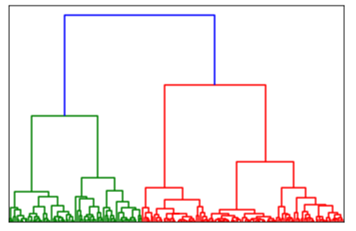
</figure>


Dendogram for Hierarchical cluster analysis


### Other implementations

For further explorations, you may look at:
 
- `scikit-learn` has an entire module sklearn.cluster that contains several clustering algorithms including k-means and the Ward hierarchical clustering algorithm (which uses a different criterion for merging clusters than ours did).

**NOTE:** There are different ways to determine the 2 clusters that are joined in each step:

- **`ward`**: minimize variance

- **`average`**: minimize average distance between every pair of points (one in each cluster)

- **`complete`**: minimize maximum distance between a pair of points, one in each cluster

SciPy has two clustering models:

- scipy.cluster.vq (which does k-means), and
- scipy.cluster.hierarchy (which has a variety of hierarchical clustering algorithms).

If you want to explore further, Jörn Hees' blog provides a great example of implementing hierarchial clustering using Scipy:

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering

## DBSCAN

Another very useful clustering algorithm is **DBSCAN (Density-Based Spatial Clustering of Applications with Noise”)**. The main benefits of DBSCAN are that it does not require the user to set the number of clusters ahead of time. It can capture clusters of complex shapes, and it can identify points that are not part of any cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.
DBSCAN works by identifying points that are in “crowded” regions of the feature space, where many data points are close together. These regions are referred to as dense regions in feature space. The idea behind DBSCAN is that clusters form dense regions of data, separated by regions that are relatively empty.

Points that are within a dense region are called core samples (or core points), and they are defined as follows:


> There are two parameters in DBSCAN: **`min_samples`** and **`eps`**. 

> If there are at least as many data points as defined by `min_samples` within a distance of `eps` to a given data point, that data point is classified as a **core sample**. Core samples that are closer to each other than the distance `eps` are put into the same cluster by DBSCAN.

The algorithm works by picking an arbitrary point to start with. It then finds all points with distance `eps` or less from that point. If there are less than `min_samples` points within distance eps of the starting point, this point is labeled as noise, meaning that it doesn’t belong to any cluster. If there are more than ` min_samples` points within a distance of `eps`, the point is labeled a core sample and assigned a new cluster label.


Then, all neighbors (within `eps`) of the point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. If they are core samples, their neighbors are visited in turn, and so on. The cluster grows until there are no more core samples within distance `eps` of the cluster. Then another point that hasn’t yet been visited is picked, and the same procedure is repeated.

In the end, there are three kinds of points:

- core points, 
- points that are within distance `eps` of core points (called boundary points), and 
- noise.


A good article about DBSCAN, but not too technical, by Gabriel Pierobon is available in Towards Data Science:
https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

(https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea)

<figure>
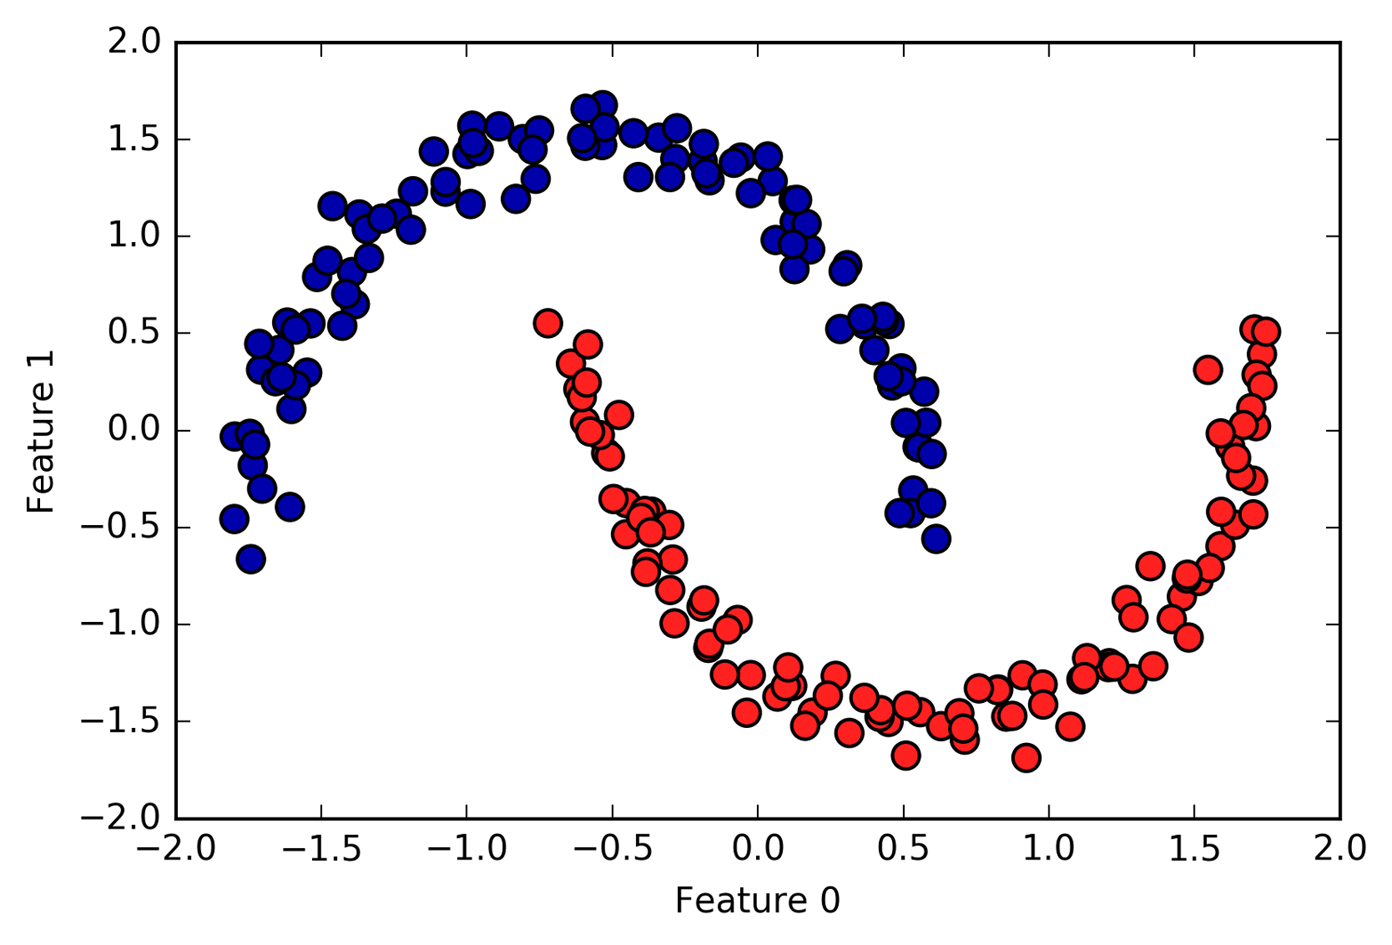
</figure>

[Andreas C. Muller, Sarah Guido-Introduction to Machine Learning with Python  A Guide for Data Scientists-O'Reilly Media (2016)]

DBSCAN is capable of capturing clusters of different shapes unlike k-means which assumes clusters are all spherical.

You can view and play with a demo of DBSCAN on Naftali Harris' blog:

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Scikit-learn has an implementation and demo as well which can be referred to here:

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html


**End of Module**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# References

Scikit learn documentation.  Retrieved from https://scikit-learn.org/stable/

Tutorial on clustering.  Retrieved from https://scikit-learn.org/stable/modules/clustering.html

Tutorial on Density estimation.  Retrieved from  https://scikit-learn.org/stable/modules/density.html

List of unsupervised algorithms available in Scikit learn.  Retrieved from https://scikit-learn.org/stable/unsupervised_learning.html#

Tutorial on Dimensionality Reduction.  Retrieved from https://scikit-learn.org/stable/modules/unsupervised_reduction.html

Lloyd's algorith.  Retrieved from Wikipedia. https://en.wikipedia.org/wiki/Lloyd%27s_algorithm

DBScan demo.  Retrieved from https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Article on DBScan.  Retrieved from  https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

Hierarchial clustering example.  Retrieved from https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering

Kmeans for image classification example. Retrieved from  https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html